# Pacific Blob

In [23]:
# imports
import os 
import datetime
import numpy as np

from matplotlib import pyplot as plt
import matplotlib.ticker as mticker

import cartopy.crs as ccrs
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER


import pandas
import iris
import iris.quickplot as qplt

from oceanpy.sst import io as sst_io
from oceanpy.utils import catalog

from mhw_analysis.events import utils as mhwe_utils

In [2]:
%matplotlib notebook

# Load MHW Systems

In [3]:
mhw_path = '/home/xavier/Projects/Oceanography/MHW/db'

In [4]:
mhw_sys = pandas.read_hdf(os.path.join(mhw_path,  'MHW_systems.hdf'))

In [5]:
mhw_sys.head()

,NSpax,category,mask_Id,max_area,xcen,xboxmin,xboxmax,ycen,yboxmin,yboxmax,zcen,zboxmin,zboxmax,date,lat,lon
Id,,,,,,,,,,,,,,,,
1,1068,1,1,40,46.225655,46,50,671.013123,663,681,100.861420,68,132,1982-04-11,-78.318586,167.878281
2,15708,1,2,1113,55.034248,46,72,685.501404,650,740,230.010315,156,329,1982-08-19,-76.116438,171.500351
3,34,2,7,4,45.500000,46,46,663.588257,663,666,365.970581,362,373,1983-01-01,-78.500000,166.022064
4,5387,1,8,206,52.332745,46,71,674.276123,651,706,472.054840,432,500,1983-04-18,-76.791814,168.694031
5,24,1,10,4,45.500000,46,46,664.000000,663,666,571.000000,569,574,1983-07-26,-78.500000,166.125000


In [6]:
mhw_sys.date

Id
1         1982-04-11
2         1982-08-19
3         1983-01-01
4         1983-04-18
5         1983-07-26
             ...    
704771    2016-03-20
704772    2017-12-16
704773    2019-12-16
704774    2017-12-19
704775    2018-12-14
Name: date, Length: 704775, dtype: object

# Find the blob!

## Winter 2014

## Build an SSTa map

In [7]:
day1 = datetime.date(2013, 12, 1)
day1.toordinal()

735203

In [8]:
cubes = iris.cube.CubeList()
dayo = []

for kk in range(90):
    #
    day_ordinal = day1.toordinal() + kk
    idate = datetime.date.fromordinal(day_ordinal)
    # Load SSTa
    SSTa = sst_io.load_noaa((idate.day, idate.month, idate.year), subtract_seasonal=True)
    # Cut on Region
    latlon_constraint = iris.Constraint(
        latitude=lambda cell: 15. <= cell < 70.,
        longitude=lambda cell: 180. < cell < 270.)
    pacific_slice = SSTa.extract(latlon_constraint)
    if kk == 0:
        sum_slice = pacific_slice
    else:
        sum_slice += pacific_slice
    #cubes.append(pacific_slice)
    #
    dayo.append(day_ordinal)

In [9]:
avg_slice = sum_slice / len(dayo)

In [10]:
avg_slice

Unknown (K),latitude,longitude
Shape,220,360
Dimension coordinates,,
latitude,x,-
longitude,-,x


## Plot

<IPython.core.display.Javascript object>


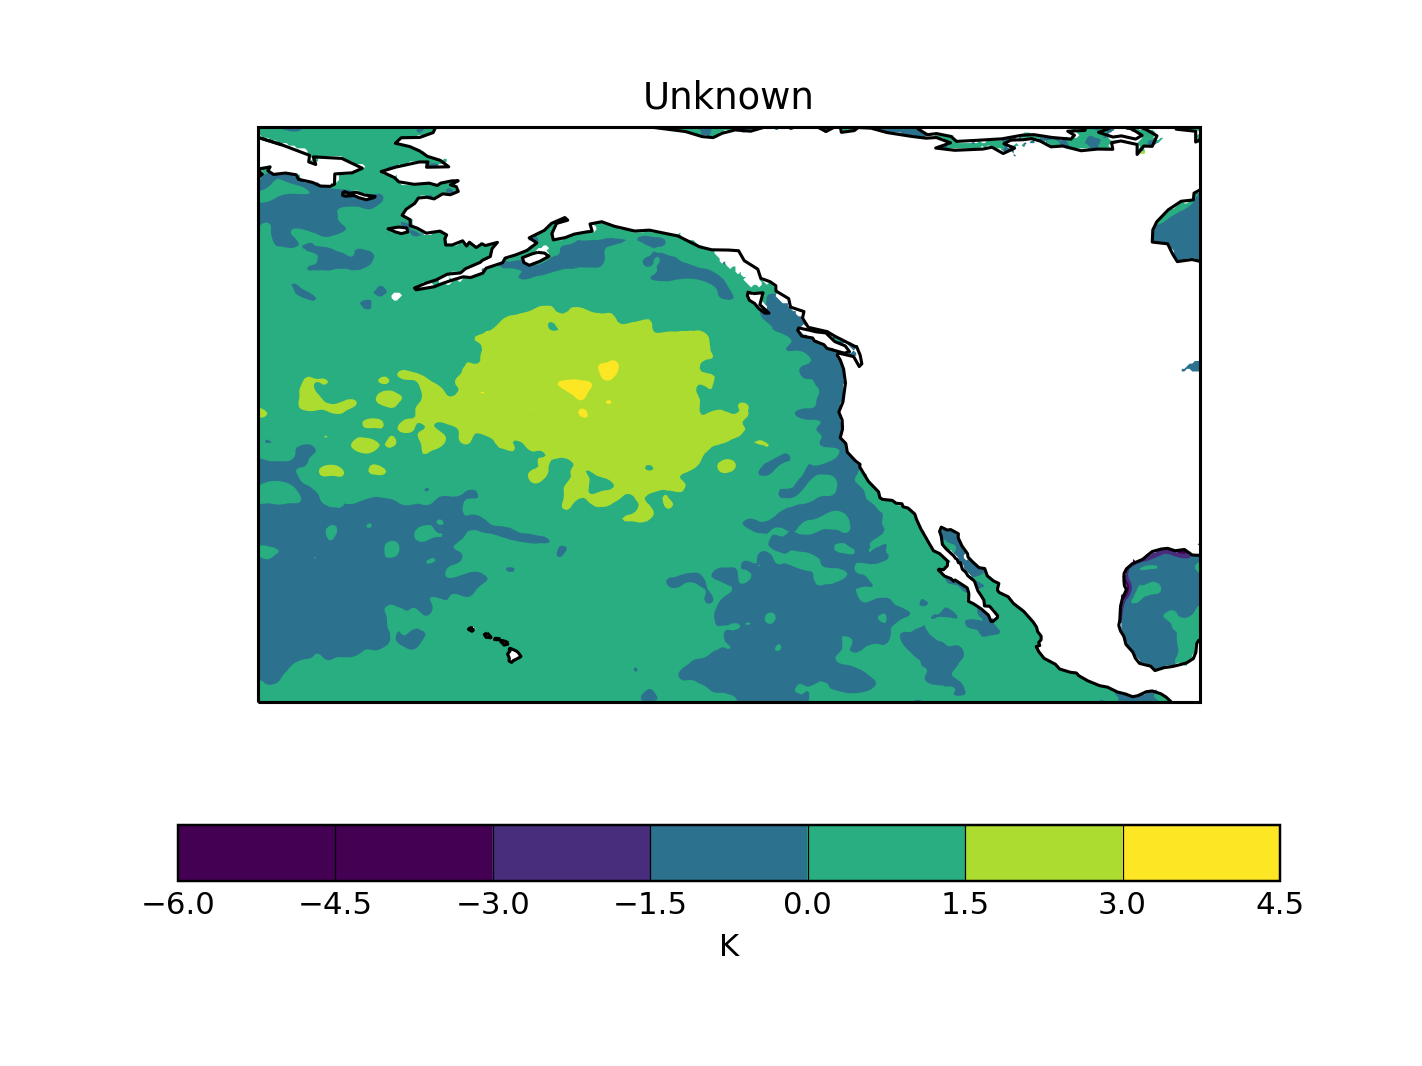

In [11]:
plt.clf()
# Draw the contour with 25 levels.
qplt.contourf(avg_slice, vmin=-3., vmax=3.)#, 25)

# Add coastlines to the map created by contourf.
plt.gca().coastlines()

plt.show()

## Scanning

In [12]:
sys_near_blob = (mhw_sys.date > datetime.date(2013,10,1)) & (mhw_sys.date < datetime.date(2016,1,1)) & (
                  mhw_sys.lat > 15.) & (mhw_sys.lat < 60.) & (mhw_sys.lon > 180.) & (mhw_sys.lon < 250) & (
                mhw_sys.max_area > 100)

In [44]:
near_blob = mhw_sys[sys_near_blob].sort_values('NSpax', ascending=False)
near_blob['duration'] = near_blob.zboxmax - near_blob.zboxmin
near_blob[['NSpax', 'lat', 'lon', 'date', 'duration', 'max_area', 'yboxmin', 'yboxmax']]

,NSpax,lat,lon,date,duration,max_area,yboxmin,yboxmax
Id,,,,,,,,
616091,8229,55.679733,186.115173,2013-10-18,81,373,724,768
470933,6557,16.010406,243.774521,2013-11-22,44,461,957,994
456011,3598,15.580322,193.412659,2013-10-29,17,537,755,794
486581,3217,19.057739,182.074677,2015-04-08,15,466,711,748
495787,3214,20.685669,227.751862,2014-06-22,50,160,902,919
492656,1991,18.957436,244.750626,2014-10-20,22,146,971,989
535669,1943,29.739449,242.535645,2013-12-31,26,131,964,976
522876,1407,26.775406,249.100037,2013-11-02,29,105,990,1005
507989,1345,23.380112,203.871933,2014-08-12,16,198,807,824


# Explore the events

## Load

In [14]:
engine = mhwe_utils.db_engine()

In [15]:
ev_near_blob = mhwe_utils.query_db(engine, latminx=(30., 60.), lonminx=(190., 230.),
                                  dateminx=((2013,11,1), (2014,3,1)))

In [16]:
ev_near_blob.head()

,date,lat,lon,ievent,duration,category,time_start
0,2014-01-05,35.625,190.125,59,7,0,735238
1,2014-01-15,35.625,190.125,60,5,0,735248
2,2014-01-05,35.875,190.125,59,16,0,735238
3,2014-01-05,36.125,190.125,59,16,0,735238
4,2013-12-30,36.375,190.125,63,21,0,735232


## Plot

In [35]:
# Events
lat_coord = SSTa.coord('latitude')
lon_coord = SSTa.coord('longitude')

i_idx = catalog.match_ids(ev_near_blob['lat'], lat_coord.points, require_in_match=True)
j_idx = catalog.match_ids(ev_near_blob['lon'], lon_coord.points, require_in_match=True)

n_events = np.zeros((lat_coord.shape[0], lon_coord.shape[0]))
tot_dur = np.zeros((lat_coord.shape[0], lon_coord.shape[0]))

for ii, jj, dur in zip(i_idx, j_idx, ev_near_blob.duration):
    n_events[ii, jj] += 1
    tot_dur[ii,jj] += dur

# Cube it
cube = iris.cube.Cube(n_events, var_name='N_events',
                      dim_coords_and_dims=[(lat_coord, 0),
                                           (lon_coord, 1)])

cube_dur = iris.cube.Cube(tot_dur, var_name='Tot_dur',
                      dim_coords_and_dims=[(lat_coord, 0),
                                           (lon_coord, 1)])

<IPython.core.display.Javascript object>


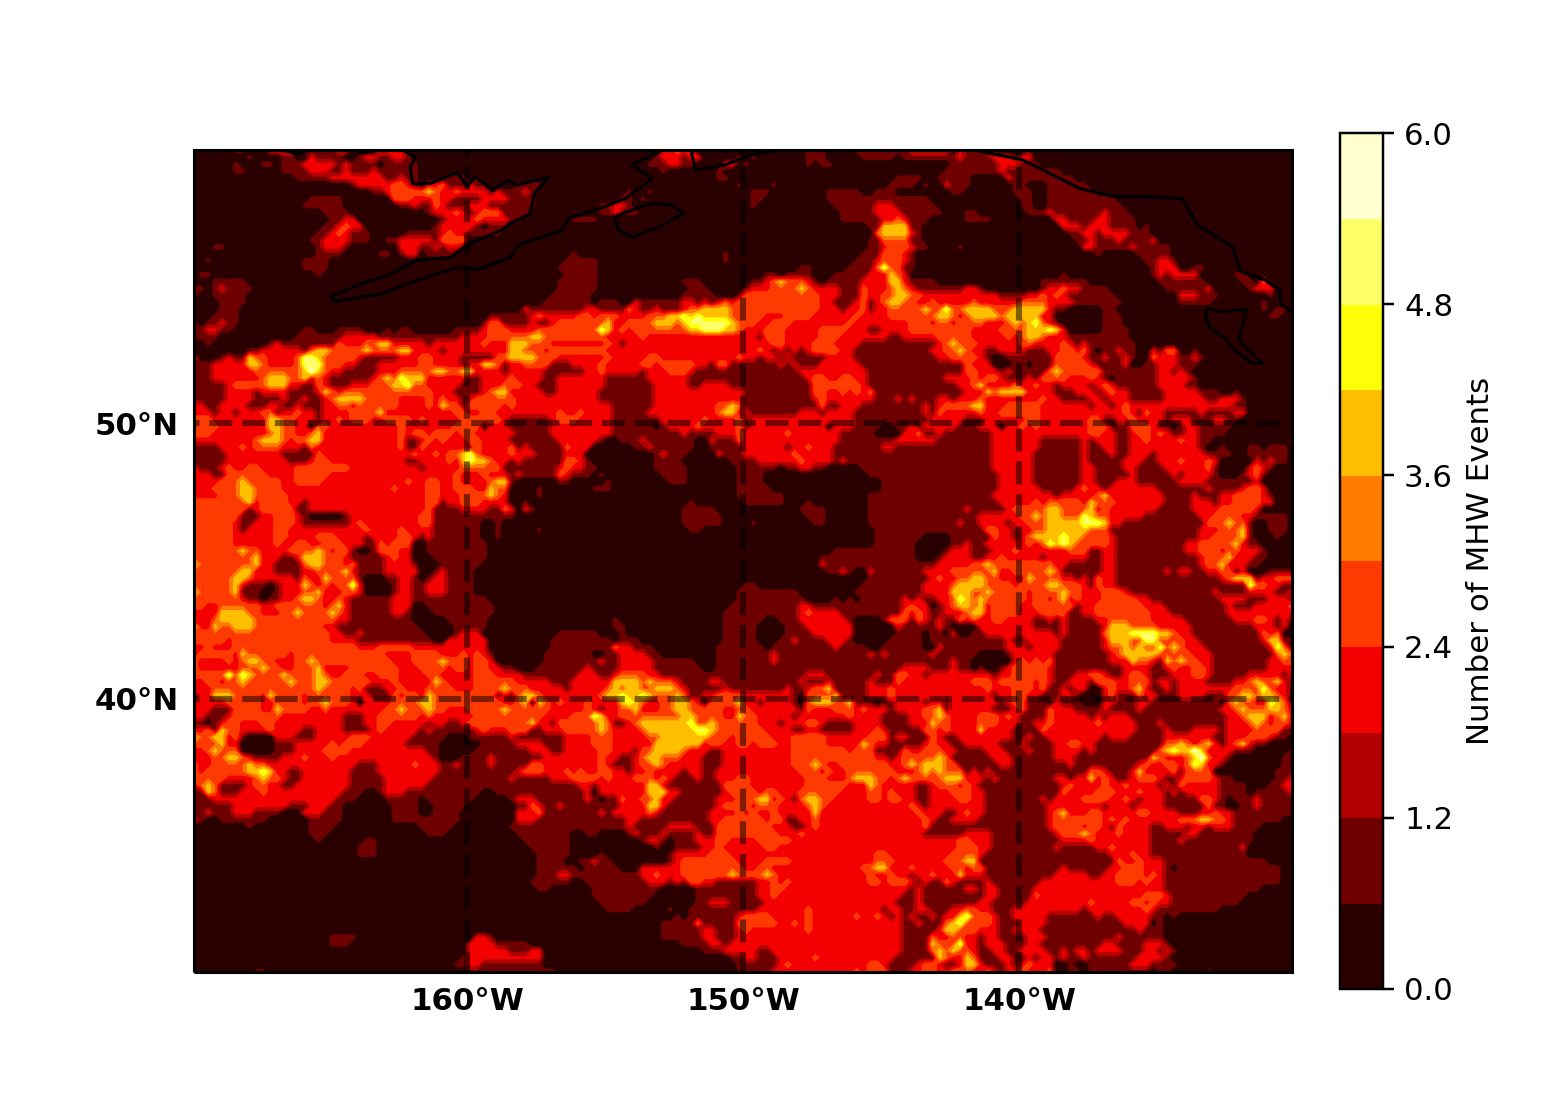

In [30]:
# Pacific
latlon_constraint = iris.Constraint(
    latitude=lambda cell: 30. <= cell < 60.,
    longitude=lambda cell: 190. < cell < 230.)
pacific_slice = cube.extract(latlon_constraint)

fig = plt.figure(figsize=(7, 5))
plt.clf()

proj = ccrs.PlateCarree(central_longitude=-180.0)
ax = plt.gca(projection=proj)

# Pacific events
# Draw the contour with 25 levels.
cm = plt.get_cmap('hot')

cplt = iris.plot.contourf(pacific_slice, 10, cmap=cm)  # , vmin=0, vmax=20)#, 5)
cb = plt.colorbar(cplt, fraction=0.050, pad=0.04)
cb.set_label('Number of MHW Events')

# Gridlines
# https://stackoverflow.com/questions/49956355/adding-gridlines-using-cartopy
gl = ax.gridlines(crs=ccrs.PlateCarree(), linewidth=2, color='black', alpha=0.5,
                  linestyle='--', draw_labels=True)
gl.xlabels_top = False
gl.ylabels_left = True
gl.ylabels_right=False
gl.xlines = True
gl.xformatter = LONGITUDE_FORMATTER
gl.yformatter = LATITUDE_FORMATTER
gl.xlabel_style = {'color': 'black', 'weight': 'bold'}
gl.ylabel_style = {'color': 'black', 'weight': 'bold'}
gl.xlocator = mticker.FixedLocator([-180., -170., -160, -150., -140, -120, -60, -20.])
gl.ylocator = mticker.FixedLocator([30., 40., 50., 60.])

# Add coastlines to the map created by contourf.
plt.gca().coastlines()
plt.show()

In [33]:
cen = ev_near_blob[(ev_near_blob.lon > 200) & (ev_near_blob.lon < 215) & (ev_near_blob.lat > 40.) & (ev_near_blob.lat < 50.)]

In [39]:
cen.sort_values('duration', ascending=False)

,date,lat,lon,ievent,duration,category,time_start
14218,2013-11-10,49.625,214.375,53,338,2,735182
14059,2013-11-11,49.625,214.125,50,337,2,735183
14219,2013-11-11,49.875,214.375,50,337,2,735183
14058,2013-11-12,49.375,214.125,57,336,2,735184
13903,2013-11-14,49.625,213.875,50,334,2,735186
...,...,...,...,...,...,...,...
6785,2014-02-14,48.625,200.625,66,5,0,735278
11247,2013-12-05,49.625,209.875,60,5,0,735207
11250,2013-12-05,49.875,209.875,62,5,0,735207
7491,2013-11-04,48.875,202.125,70,5,0,735176


In [40]:
datetime.date.fromordinal(735182)

datetime.date(2013, 11, 10)

<IPython.core.display.Javascript object>


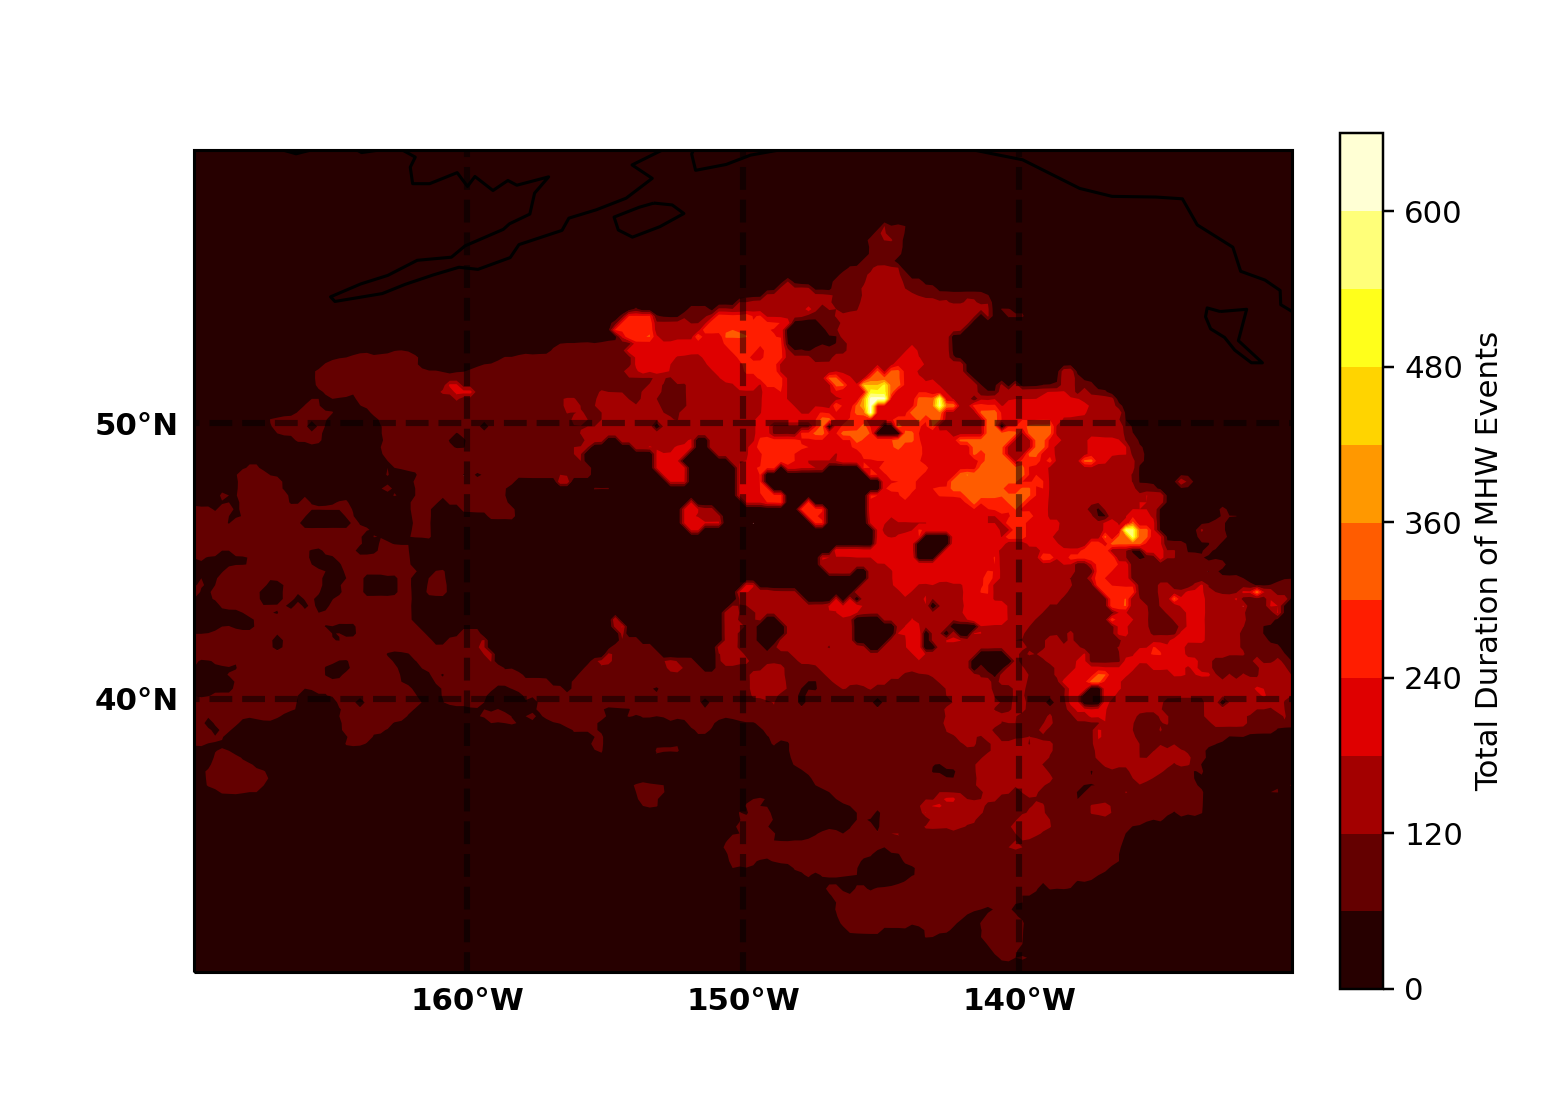

In [36]:
# Pacific
latlon_constraint = iris.Constraint(
    latitude=lambda cell: 30. <= cell < 60.,
    longitude=lambda cell: 190. < cell < 230.)
pacific_slice = cube_dur.extract(latlon_constraint)

fig = plt.figure(figsize=(7, 5))
plt.clf()

proj = ccrs.PlateCarree(central_longitude=-180.0)
ax = plt.gca(projection=proj)

# Pacific events
# Draw the contour with 25 levels.
cm = plt.get_cmap('hot')

cplt = iris.plot.contourf(pacific_slice, 10, cmap=cm)  # , vmin=0, vmax=20)#, 5)
cb = plt.colorbar(cplt, fraction=0.050, pad=0.04)
cb.set_label('Total Duration of MHW Events')

# Gridlines
# https://stackoverflow.com/questions/49956355/adding-gridlines-using-cartopy
gl = ax.gridlines(crs=ccrs.PlateCarree(), linewidth=2, color='black', alpha=0.5,
                  linestyle='--', draw_labels=True)
gl.xlabels_top = False
gl.ylabels_left = True
gl.ylabels_right=False
gl.xlines = True
gl.xformatter = LONGITUDE_FORMATTER
gl.yformatter = LATITUDE_FORMATTER
gl.xlabel_style = {'color': 'black', 'weight': 'bold'}
gl.ylabel_style = {'color': 'black', 'weight': 'bold'}
gl.xlocator = mticker.FixedLocator([-180., -170., -160, -150., -140, -120, -60, -20.])
gl.ylocator = mticker.FixedLocator([30., 40., 50., 60.])

# Add coastlines to the map created by contourf.
plt.gca().coastlines()
plt.show()

## Stats

In [31]:
ev_near_blob.duration

0         7
1         5
2        16
3        16
4        21
         ..
24387    15
24388     8
24389    36
24390     7
24391     5
Name: duration, Length: 24392, dtype: int64

<IPython.core.display.Javascript object>


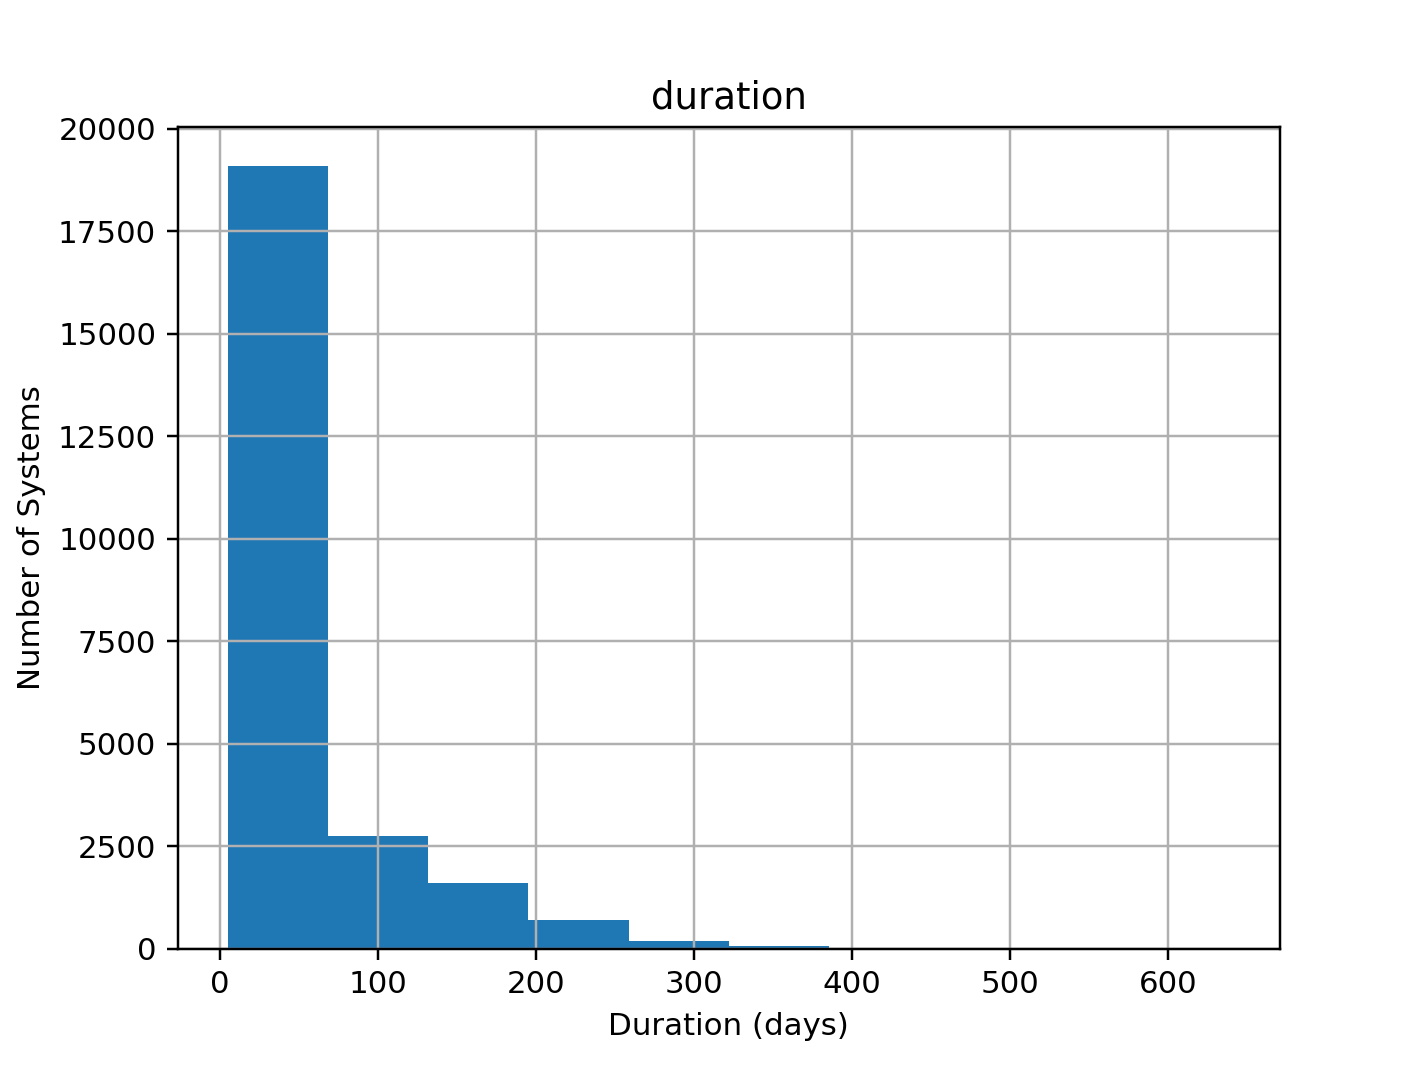

In [32]:
plt.clf()
ax = plt.gca()
ev_near_blob.hist(column='duration', ax=ax)
#
ax.set_xlabel('Duration (days)')
ax.set_ylabel(r'Number of Systems')
#ax.set_yscale('log')
#
plt.show()

## Checking the systems

In [42]:
sys_near_blob2 = (mhw_sys.date > datetime.date(2013,10,1)) & (mhw_sys.date < datetime.date(2016,1,1)) & (
                  mhw_sys.lat > 15.) & (mhw_sys.lat < 60.) & (mhw_sys.lon > 180.) & (mhw_sys.lon < 250)

In [45]:
near_blob2 = mhw_sys[sys_near_blob2]
near_blob2['duration'] = near_blob2.zboxmax - near_blob2.zboxmin

/home/xavier/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [46]:
near_blob2 = near_blob2.sort_values('duration', ascending=False)
near_blob2[['NSpax', 'lat', 'lon', 'date', 'duration', 'max_area', 'yboxmin', 'yboxmax']]

,NSpax,lat,lon,date,duration,max_area,yboxmin,yboxmax
Id,,,,,,,,
616091,8229,55.679733,186.115173,2013-10-18,81,373,724,768
523812,1059,27.275024,237.918549,2014-04-01,68,57,944,957
607329,803,49.244705,235.894150,2015-06-01,59,20,939,948
563553,1499,37.731987,231.869751,2014-01-16,57,76,921,936
558935,1311,35.760300,233.988556,2014-01-28,52,43,931,939
...,...,...,...,...,...,...,...,...
590470,20,43.250000,207.875000,2015-01-21,4,4,831,832
521694,10,24.000000,192.625000,2015-01-19,4,2,770,771
521693,10,24.000000,192.625000,2014-01-16,4,2,770,771


## Check the cube

In [52]:
cen = cen.sort_values('duration', ascending=False)
cen.head()

,date,lat,lon,ievent,duration,category,time_start
14218,2013-11-10,49.625,214.375,53,338,2,735182
14059,2013-11-11,49.625,214.125,50,337,2,735183
14219,2013-11-11,49.875,214.375,50,337,2,735183
14058,2013-11-12,49.375,214.125,57,336,2,735184
13903,2013-11-14,49.625,213.875,50,334,2,735186


In [48]:
cubefile = '/home/xavier/Projects/Oceanography/MHW/db/MHWevent_cube.npz'
cube = np.load(cubefile)['cube']

In [49]:
cube.shape

(720, 1440, 13879)

In [53]:
ev0 = cen.loc[14218]
ev0

date          2013-11-10 00:00:00
lat                        49.625
lon                       214.375
ievent                         53
duration                      338
category                        2
time_start                 735182
Name: 14218, dtype: object

### Space

In [58]:
ilat_ev = catalog.match_ids(np.array([ev0.lat]), lat_coord.points, require_in_match=True)[0]
jlon_ev = catalog.match_ids(np.array([ev0.lon]), lon_coord.points, require_in_match=True)[0]
ilat_ev, jlon_ev

(558, 857)

### Time

In [59]:
# Start time
dmy_start=(1982,1,1)
t0 = datetime.date(dmy_start[0], dmy_start[1], dmy_start[2]).toordinal()

In [60]:
kt_ev = ev0.time_start - t0
kt_ev

11636

In [65]:
datetime.date.fromordinal(t0 + 11600)

datetime.date(2013, 10, 5)

In [64]:
cube[ilat_ev, jlon_ev, kt_ev:kt_ev+339]

array([3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,

# System map

## Load mask

In [100]:
#sys_mask = np.load(os.path.join(mhw_path, 'MHW_mask.npz'))['mask']

KeyboardInterrupt: 

----

# TEST

In [29]:
noaa_path = os.getenv('NOAA_OI')
noaa_file = os.path.join(noaa_path, 'sst.day.mean.{}.nc'.format(1983))

In [30]:
sst_cube = iris.load(noaa_file, 'sst')[0]

In [31]:
sst_cube

<iris 'Cube' of Daily Sea Surface Temperature / (degC) (time: 365; latitude: 720; longitude: 1440)>

In [53]:
pdt1 = iris.time.PartialDateTime(year=1983, month=12, day=1)
pdt2 = iris.time.PartialDateTime(year=1983, month=12, day=2)

In [57]:
constraint = iris.Constraint(time=lambda cell: pdt1 <= cell.point <= pdt2)

In [58]:
cube = sst_cube.extract(constraint)

In [59]:
cube

<iris 'Cube' of Daily Sea Surface Temperature / (degC) (time: 2; latitude: 720; longitude: 1440)>

In [34]:
times.points

array([66839., 66840., 66841., 66842., 66843., 66844., 66845., 66846.,
       66847., 66848., 66849., 66850., 66851., 66852., 66853., 66854.,
       66855., 66856., 66857., 66858., 66859., 66860., 66861., 66862.,
       66863., 66864., 66865., 66866., 66867., 66868., 66869., 66870.,
       66871., 66872., 66873., 66874., 66875., 66876., 66877., 66878.,
       66879., 66880., 66881., 66882., 66883., 66884., 66885., 66886.,
       66887., 66888., 66889., 66890., 66891., 66892., 66893., 66894.,
       66895., 66896., 66897., 66898., 66899., 66900., 66901., 66902.,
       66903., 66904., 66905., 66906., 66907., 66908., 66909., 66910.,
       66911., 66912., 66913., 66914., 66915., 66916., 66917., 66918.,
       66919., 66920., 66921., 66922., 66923., 66924., 66925., 66926.,
       66927., 66928., 66929., 66930., 66931., 66932., 66933., 66934.,
       66935., 66936., 66937., 66938., 66939., 66940., 66941., 66942.,
       66943., 66944., 66945., 66946., 66947., 66948., 66949., 66950.,
      

In [37]:
tmp = iris.coords.DimCoord([66983.], standard_name='time', units=times.units)

In [38]:
tmp

DimCoord(array([66983.]), standard_name='time', units=Unit('days since 1800-01-01 00:00:00', calendar='gregorian'))

In [44]:
tmp2 = cubes[0]
tmp2

Unknown (degC),latitude,longitude
Shape,220,360
Dimension coordinates,,
latitude,x,-
longitude,-,x


In [47]:
tmp2.add_dim_coord(tmp, 1)

ValueError: A dim_coord is already associated with dimension 1.